In [1]:
#%matplotlib inline

In [2]:
pwd

'D:\\Deep_learning\\Practical-Deep-Learning'

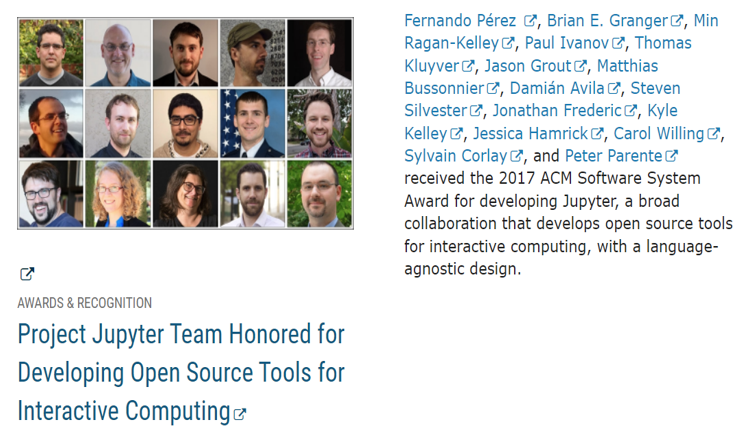

_df_ *italics*  __bold__ **bold** `inline`

_df_ *italics*  __bold__ **bold** `inline`

[ppi-web.onrender.com](ppi-web.onrender.com)

[ppi-web.onrender.com](ppi-web.onrender.com)

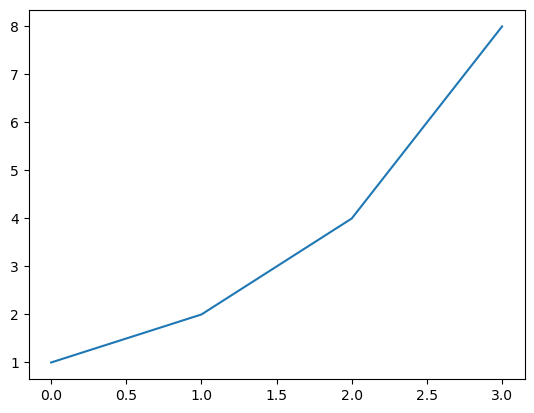

In [8]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d 

import matplotlib.pyplot as plt

plt.plot([a,b,c,d])
plt.show()

#%debug

In [9]:
%timeit [i+1 for i in range(100)]

2.94 μs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
!pip install -Uqq fastai

In [11]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1',53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [12]:

import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [13]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [14]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

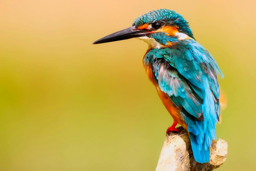

In [15]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [16]:
urls1 = search_images('forest photo', max_images=1)
urls1[0]

'https://images.pexels.com/photos/1125776/pexels-photo-1125776.jpeg?cs=srgb&dl=forest-grass-green-1125776.jpg&fm=jpg'

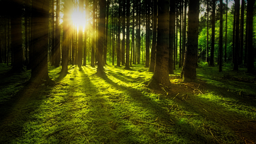

In [17]:
from fastdownload import download_url
dest = 'forest.jpg'
download_url(urls1[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [18]:
# searches = 'forest','bird'
# path = Path('bird_or_not')

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     time.sleep(5)
#     resize_images(path/o, max_size=400, dest=path/o)

In [19]:
# failed = verify_images(get_image_files(path))
# failed.map(Path.unlink)
# len(failed)

# Traning Model

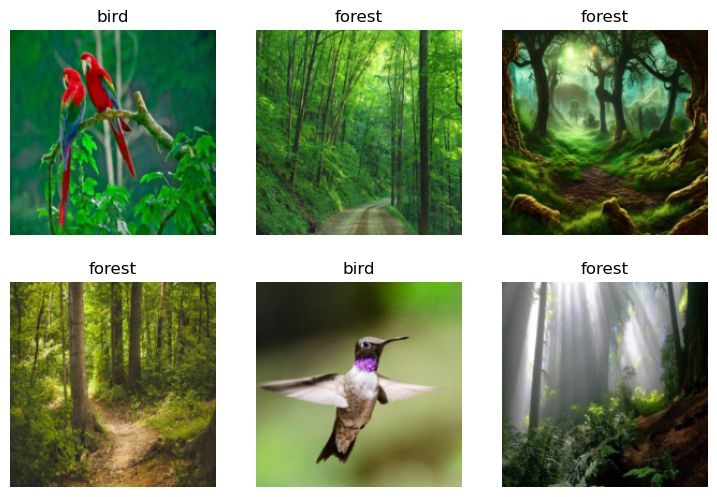

In [21]:
path = Path('bird_or_not')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [22]:
learn = vision_learner(dls,resnet18,metrics = error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.595285,0.007356,0.000000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.026232,0.000127,0.000000,00:06
1,0.014379,0.000722,0.000000,00:06
2,0.024100,0.000549,0.000000,00:06


In [23]:
print(torch.cuda.is_available())  # Should return True
print(torch.__version__)  # Check the PyTorch version


True
2.5.1+cu121


In [50]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")


This is a: bird.
Probability it's a bird: 1.0000
